In [1]:
#A_ch02_005_Linear_20171211.ipynb
#linear regression(線性迴歸) / ordinary least squares, OLS (最小平方法) 
#y=w[0]*X+b (w[0]-->斜率, b-->截距)
#用一個線性函數來做預測

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#產生一個資料集(波型資料), mglearn.datasets.make_wave()
import mglearn

In [4]:
mglearn.plots.plot_linear_regression_wave?

w[0]: 0.393906  b: -0.031804


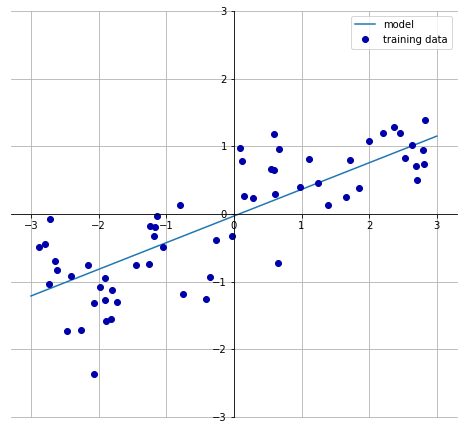

In [5]:
#以 mglearn package 提供的繪圖範例繪圖展示 linear regression model
mglearn.plots.plot_linear_regression_wave() #w[0]-->斜率, b-->截距

In [6]:
#匯入scikit-learn中的線性迴歸模組 LinearRegression
from sklearn.linear_model import LinearRegression

In [7]:
#生成一個60個資料點的wave資料,以 mglearn.dateset.make_wave()
X,y=mglearn.datasets.make_wave(n_samples=60)

In [8]:
#檢視make_wave() 合成的測試資料

In [9]:
print('X.shape -->',X.shape,' y.shape -->',y.shape,' X[0]-->',X[0],' y[0]-->',y[0])

X.shape --> (60, 1)  y.shape --> (60,)  X[0]--> [-0.75275929]  y[0]--> -1.18073310919


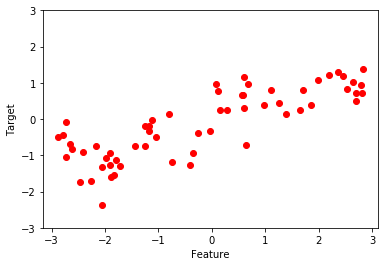

In [10]:
#繪製圖型檢視
plt.plot(X,y,'ro') #'ro', r--> red, o--> 圈圈; 你可以試試 'g^'
plt.ylim(-3,3)
plt.xlabel("Feature")  #Feature X
plt.ylabel("Target")   #Label y

In [11]:
#import train_test_split() function
from sklearn.model_selection import train_test_split

In [12]:
#準備訓練(train)與測試(test)資料集 (train:test  3:1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [13]:
print('len(X_train):',len(X_train),' len(X_test):',len(X_test))

len(X_train): 45  len(X_test): 15


In [14]:
#1. train phase:
#叫用 LinearRegression , fit() method. 以train dataset X_train,y_train 做訓練
#訓練後得到一個 LinearRegression model object 'lrModel'
lrModel=LinearRegression().fit(X_train,y_train)

In [15]:
#檢視 lrModel 的斜率(w[0]) 及 截距(b)
print("lrModel.coef_(斜率,w[0]):{}".format(lrModel.coef_))         #Model.coef_ 存放斜率
print("lrModel.intercept_(截距,b):{}".format(lrModel.intercept_))  #Model.intercept_ 存放截距,
                                                                 #scikit-learn會將從訓練集得到的屬性加上 '_',以區別使用者設定的屬性

lrModel.coef_(斜率,w[0]):[ 0.39390555]
lrModel.intercept_(截距,b):-0.031804343026759746


In [17]:
#2.predict, 使用已訓練模型 lrModel.predict()
px=np.array([-1.4]) #以np.array() 將 list [-1.4] 轉換為 1d array
px=px.reshape(-1,1) #再 reshape 為 2d array (1,1)
lrModel.predict(px) #以 lrModel.predict() 預測

array([-0.58327211])

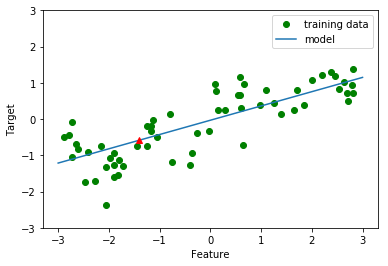

In [18]:
plt.plot(X,y,'go') #'ro', r--> red, o--> 圈圈; 你可以試試 'g^'
plt.ylim(-3,3)
plt.xlabel("Feature")  #Feature X
plt.ylabel("Target")   #Label y
line = np.linspace(-3, 3, num=100).reshape(-1, 1)  #以np.linespace().reshape(-1,1) 產生測試資料 line
plt.plot(line, lrModel.predict(line))              #將 line 以 lrModel.predict() 預測並畫圖
ax = plt.gca()
ax.legend(["training data","model"], loc="best")
plt.plot(px,lrModel.predict(px),'r^')  #將預測結果以 'g^' 畫出

In [19]:
#2. 3. predict, Evaluation
#以lrModel.score() method
print("訓練集分數,score(X_train,y_train):{:.2f}".format(lrModel.score(X_train,y_train)))
print("測試集分數,score(X_test,y_test):{:.2f}".format(lrModel.score(X_test,y_test)))

訓練集分數,score(X_train,y_train):0.67
測試集分數,score(X_test,y_test):0.66


In [20]:
#此模型(lrModel) 在 train 資料集與 test 資料集 計算的 auc 值差異不大 (雖然兩者都不高) 
#顯示並無 orverfittin 問題

In [21]:
#===============================================================================
#part II: LinearRegression 在 Boston Dataset (506 data point, 105 衍生 feature)
#         真實複雜資料集
#         前面,我們使用 make_wave() 合成資料做說明, 並無明顯 overfitting 問題
#         以下,我們以一個真實資料集 Boston Dataset, 實作說明 overfitting 

In [22]:
#準備資料
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [23]:
#檢視 train 及 test 資料集
print('len(X_train):',len(X_train),' len(X_test):',len(X_test))

len(X_train): 379  len(X_test): 127


In [24]:
#訓練, 以 train 資料集
lrModel=LinearRegression().fit(X_train,y_train)

In [25]:
#predict, Evaluation
print("訓練集分數,score(X_train,y_train):{:.2f}".format(lrModel.score(X_train,y_train)))
print("測試集分數,score(X_test,y_test):{:.2f}".format(lrModel.score(X_test,y_test)))

訓練集分數,score(X_train,y_train):0.95
測試集分數,score(X_test,y_test):0.61


In [26]:
#非常明顯的 orverfitting

In [35]:
#因為標準線性迴歸不允許我們控制複雜度
#我們常以多變數線性迴歸(ridge regression) 替代